# Imports

In [1]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp
from keras_opt import scipy_optimizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Using Basic Data

## Data Loading/Preparation

In [7]:
data = pd.read_csv('./datasets/assignment02_californiahousing.csv')
X = data.drop(columns=['MedHouseVal'])
y = data['MedHouseVal']
predictors = ["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"]

preprocessor = make_column_transformer(
        (StandardScaler(), predictors),
        remainder='passthrough')
    


X_transformed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=3619)  

## Prelim Model

In [ ]:
model = keras.Sequential([ 
    keras.layers.Dense(512, activation='relu', input_shape=(8,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model.compile(loss='mean_squared_error', 
              optimizer='adam', # keras.optimizers.adam(0.001) for example if I want to define a LR, otherwise it's pre-defined
              metrics=['mae'])

history_adam = model.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test))

Epoch 1/20
65/65 [==============================] - 2s 13ms/step - loss: 1.4750 - mae: 0.8571 - val_loss: 4.2300 - val_mae: 0.6070
Epoch 2/20
65/65 [==============================] - 1s 8ms/step - loss: 0.6274 - mae: 0.5868 - val_loss: 1.0789 - val_mae: 0.6498
Epoch 3/20
65/65 [==============================] - 1s 8ms/step - loss: 1.2038 - mae: 0.7549 - val_loss: 1.5276 - val_mae: 0.5973
Epoch 4/20
65/65 [==============================] - 0s 7ms/step - loss: 1.2924 - mae: 0.7937 - val_loss: 26.3128 - val_mae: 0.7780
Epoch 5/20
65/65 [==============================] - 0s 8ms/step - loss: 13.0469 - mae: 2.3942 - val_loss: 10.1922 - val_mae: 0.8180
Epoch 6/20
65/65 [==============================] - 0s 7ms/step - loss: 41.1856 - mae: 3.8625 - val_loss: 63.5595 - val_mae: 1.2153
Epoch 7/20
65/65 [==============================] - 1s 8ms/step - loss: 1.4736 - mae: 0.8442 - val_loss: 23.3675 - val_mae: 0.7296
Epoch 8/20
65/65 [==============================] - 0s 7ms/step - loss: 55.2185 - m

## L-BFGS Optimizer (via keras_opt)

In [ ]:
# runtime: 107 minutes
model2 = keras.Sequential([ 
    keras.layers.Dense(512, activation='relu', input_shape=(8,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model2.compile(loss='mean_squared_error', 
             metrics=['mae'])

model2.train_function = scipy_optimizer.make_train_function(
            model2, maxiter=20)

history_lfbgs = model2.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256,
                           validation_data=(X_test, y_test))

Epoch 1/20
   1299/Unknown - 10s 8ms/step - loss: 5.5831

2025-10-21 20:04:21.393333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 8ms/step - loss: 1.2758

2025-10-21 20:04:38.594928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 7ms/step - loss: 149.3393

2025-10-21 20:04:53.060901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 8ms/step - loss: 1.0190

2025-10-21 20:05:07.827185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 11s 8ms/step - loss: 0.9166

2025-10-21 20:05:23.491384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 10s 7ms/step - loss: 21.8426

2025-10-21 20:05:38.193545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.8528

2025-10-21 20:05:52.453046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.9476

2025-10-21 20:06:06.498931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 8ms/step - loss: 0.6427

2025-10-21 20:06:21.951857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 1.6748

2025-10-21 20:06:36.105809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 10s 7ms/step - loss: 0.5994

2025-10-21 20:06:50.415510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 8ms/step - loss: 0.6390

2025-10-21 20:07:05.388529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 7ms/step - loss: 0.5855

2025-10-21 20:07:19.980719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5733

2025-10-21 20:07:33.980027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5608

2025-10-21 20:07:47.813685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.6374

2025-10-21 20:08:01.307209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5590

2025-10-21 20:08:15.066789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5695

2025-10-21 20:08:29.073514: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5635

2025-10-21 20:08:42.568564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5484

2025-10-21 20:08:56.006186: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.6287

2025-10-21 20:09:09.330358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5458

2025-10-21 20:09:22.865836: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5185

2025-10-21 20:09:36.495670: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 8ms/step - loss: 0.5875

2025-10-21 20:09:51.086899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 8ms/step - loss: 0.5149

2025-10-21 20:10:07.340804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5167

2025-10-21 20:10:20.861389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 10s 8ms/step - loss: 0.5141

2025-10-21 20:10:34.953015: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5149

2025-10-21 20:10:49.570929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5142

2025-10-21 20:11:03.426655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:11:17.346828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 10s 8ms/step - loss: 0.5139

2025-10-21 20:11:32.279425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 10s 8ms/step - loss: 0.5139

2025-10-21 20:11:47.839260: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:12:01.741212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5170

2025-10-21 20:12:16.149353: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 11s 8ms/step - loss: 0.5138

2025-10-21 20:12:32.097482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5145

2025-10-21 20:12:46.032940: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 10s 7ms/step - loss: 0.5141

2025-10-21 20:13:00.325256: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:13:14.280903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:13:28.010286: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 20:13:41.626172: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:13:54.851607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:14:08.484078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 20:14:22.456021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 20:14:36.505764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 10s 8ms/step - loss: 0.5138

2025-10-21 20:14:51.306779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.514828
         Iterations: 10
         Function evaluations: 45
         Gradient evaluations: 37
65/65 [==============================] - ETA: 0s - loss: 0.5148

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


65/65 [==============================] - 646s 10s/step - loss: 4.5116 - val_loss: 0.5945 - val_mae: 0.5453
Epoch 2/20
   1293/Unknown - 10s 7ms/step - loss: 0.5148

2025-10-21 20:15:06.562473: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 1.1065

2025-10-21 20:15:20.778432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 20:15:33.858684: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5151

2025-10-21 20:15:47.204111: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:16:00.357537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 7ms/step - loss: 0.5139

2025-10-21 20:16:14.364478: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5146

2025-10-21 20:16:28.652603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5143

2025-10-21 20:16:42.558730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:16:56.138544: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 10s 8ms/step - loss: 0.5155

2025-10-21 20:17:10.991218: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 8ms/step - loss: 0.5139

2025-10-21 20:17:26.485974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 10s 8ms/step - loss: 0.5133

2025-10-21 20:17:41.442190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 10s 7ms/step - loss: 0.5138

2025-10-21 20:17:55.885335: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 10s 8ms/step - loss: 0.5137

2025-10-21 20:18:10.696469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 8ms/step - loss: 0.5136

2025-10-21 20:18:25.807207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:18:40.172655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:18:53.997931: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 8ms/step - loss: 0.5142

2025-10-21 20:19:08.913889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 8ms/step - loss: 0.5143

2025-10-21 20:19:23.646548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5143

2025-10-21 20:19:37.361012: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 7ms/step - loss: 0.5143

2025-10-21 20:19:51.595399: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5143

2025-10-21 20:20:05.944557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:20:20.144830: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:20:33.764150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5144

2025-10-21 20:20:46.984572: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 20:21:00.404810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5142

2025-10-21 20:21:13.678664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 20:21:27.513746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 20:21:41.819308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.514356
         Iterations: 1
         Function evaluations: 29
         Gradient evaluations: 18
65/65 [==============================] - 410s 6s/step - loss: 0.5144 - val_loss: 0.5901 - val_mae: 0.5422
Epoch 3/20
      0/Unknown - 0s 0s/step - loss: 0.4880

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1295/Unknown - 10s 7ms/step - loss: 0.5142

2025-10-21 20:21:56.059928: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 1.3991

2025-10-21 20:22:09.510126: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 8ms/step - loss: 0.5136

2025-10-21 20:22:23.796556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5142

2025-10-21 20:22:37.478987: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:22:50.793869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:23:04.148397: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:23:17.341973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:23:30.534207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:23:43.809637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:23:57.118742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:24:10.459903: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 1.3989

2025-10-21 20:24:23.702305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.7281

2025-10-21 20:24:36.993113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 8ms/step - loss: 0.5623

2025-10-21 20:24:51.845267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:25:05.764675: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 11s 8ms/step - loss: 0.5136

2025-10-21 20:25:21.119549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:25:35.489867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 10s 7ms/step - loss: 0.5167

2025-10-21 20:25:49.625519: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:26:03.218406: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 11s 9ms/step - loss: 0.5137

2025-10-21 20:26:19.280696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 11s 8ms/step - loss: 0.5136

2025-10-21 20:26:34.705178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:26:48.881820: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 7ms/step - loss: 0.5133

2025-10-21 20:27:03.208002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:27:17.133746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 7ms/step - loss: 0.5132

2025-10-21 20:27:31.976347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:27:45.855175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:27:59.644341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:28:13.524720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:28:27.286293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:28:41.427508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:28:55.163860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:29:08.809007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:29:22.693604: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 14s 11ms/step - loss: 0.5140

2025-10-21 20:29:41.675356: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 11s 8ms/step - loss: 0.5139

2025-10-21 20:29:57.809386: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 8ms/step - loss: 0.5135

2025-10-21 20:30:12.560595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 8ms/step - loss: 0.5135

2025-10-21 20:30:27.217293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513769
         Iterations: 1
         Function evaluations: 37
         Gradient evaluations: 22
65/65 [==============================] - 526s 8s/step - loss: 0.5138 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 4/20
      0/Unknown - 0s 0s/step - loss: 0.4423

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:30:41.598110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.6656

2025-10-21 20:30:55.106282: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 7ms/step - loss: 0.5136

2025-10-21 20:31:09.476047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:31:23.535280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:31:37.186267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:31:50.686423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:32:03.981401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:32:17.303099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:32:30.983793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.6657

2025-10-21 20:32:44.500424: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5148

2025-10-21 20:32:57.816132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:33:11.279682: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5144

2025-10-21 20:33:24.600823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:33:38.066954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:33:51.474968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:34:04.752905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:34:18.199175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:34:31.924249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:34:45.891410: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:34:59.972081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:35:13.981490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513717
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 11
65/65 [==============================] - 286s 4s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 5/20
      8/Unknown - 0s 8ms/step - loss: 0.5545

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1297/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:35:27.513249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.6570

2025-10-21 20:35:40.783751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:35:54.053997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 10s 8ms/step - loss: 0.5137

2025-10-21 20:36:08.495851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:36:22.093775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:36:35.913119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:36:49.183138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:37:02.577864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:37:15.854447: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 7ms/step - loss: 0.5136

2025-10-21 20:37:29.781153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.6574

2025-10-21 20:37:43.341533: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5145

2025-10-21 20:37:56.617298: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:38:10.090184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:38:23.453892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:38:37.044063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:38:50.507838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:39:03.735942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:39:17.473475: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 10s 8ms/step - loss: 0.5135

2025-10-21 20:39:31.924973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 8ms/step - loss: 0.5138

2025-10-21 20:39:47.360796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:40:01.207565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:40:15.357227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513654
         Iterations: 0
         Function evaluations: 22
         Gradient evaluations: 12
65/65 [==============================] - 301s 5s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 6/20
      7/Unknown - 0s 9ms/step - loss: 0.4829

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1298/Unknown - 10s 8ms/step - loss: 0.5136

2025-10-21 20:40:29.765128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.6583

2025-10-21 20:40:43.674715: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:40:57.408068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:41:10.795626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:41:24.756641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 10s 8ms/step - loss: 0.5135

2025-10-21 20:41:39.191196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 7ms/step - loss: 0.5136

2025-10-21 20:41:53.535870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 10s 7ms/step - loss: 0.5136

2025-10-21 20:42:08.603539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:42:22.564948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:42:36.804913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.6585

2025-10-21 20:42:50.802489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5150

2025-10-21 20:43:04.004291: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:43:17.506672: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5142

2025-10-21 20:43:31.754290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:43:45.468280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 7ms/step - loss: 0.5135

2025-10-21 20:43:59.705895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:44:13.762355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 8ms/step - loss: 0.5136

2025-10-21 20:44:29.530063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:44:43.855148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:44:57.397362: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:45:11.291539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:45:25.135613: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513543
         Iterations: 0
         Function evaluations: 22
         Gradient evaluations: 13
65/65 [==============================] - 310s 5s/step - loss: 0.5135 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 7/20
      7/Unknown - 0s 9ms/step - loss: 0.5037

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1292/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:45:38.913456: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.6664

2025-10-21 20:45:52.118562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 20:46:05.500211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:46:18.626415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:46:31.927400: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:46:45.218771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:46:58.553902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:47:11.878668: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:47:25.480293: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:47:38.919384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:47:52.167605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:48:05.462167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.6664

2025-10-21 20:48:18.775680: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5149

2025-10-21 20:48:32.139156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:48:45.609719: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:48:58.856319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:49:12.117461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:49:25.489704: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:49:38.985308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:49:53.069108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:50:06.843226: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:50:20.283215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:50:33.706068: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:50:46.888727: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513753
         Iterations: 0
         Function evaluations: 24
         Gradient evaluations: 14
65/65 [==============================] - 322s 5s/step - loss: 0.5138 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 8/20
      0/Unknown - 0s 0s/step - loss: 0.5208

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1292/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:51:00.436694: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.6560

2025-10-21 20:51:13.713445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:51:27.091164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:51:40.332742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:51:53.486262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5132

2025-10-21 20:52:06.811502: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:52:19.945300: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 10s 7ms/step - loss: 0.5136

2025-10-21 20:52:33.972145: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:52:47.464432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.6555

2025-10-21 20:53:00.708236: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5149

2025-10-21 20:53:14.067420: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:53:27.411299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:53:40.849158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:53:54.071157: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:54:07.493868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:54:20.692182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:54:33.987843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 10s 8ms/step - loss: 0.5137

2025-10-21 20:54:48.528954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:55:02.598681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:55:16.622312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:55:29.890904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513523
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 11
65/65 [==============================] - 283s 4s/step - loss: 0.5135 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 9/20
      7/Unknown - 0s 9ms/step - loss: 0.4751

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:55:43.227583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.6597

2025-10-21 20:55:57.083593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 20:56:10.633560: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:56:24.078531: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:56:37.311660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 20:56:50.685088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:57:03.883722: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:57:17.103943: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5131

2025-10-21 20:57:30.546320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.6594

2025-10-21 20:57:43.889528: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5149

2025-10-21 20:57:57.319839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 20:58:10.573905: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:58:23.882539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:58:37.291909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:58:50.598747: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 20:59:04.039557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 20:59:17.303650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 20:59:30.505344: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 20:59:44.066636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 20:59:57.365702: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 21:00:10.823163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513705
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 13
65/65 [==============================] - 281s 4s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 10/20
      8/Unknown - 0s 8ms/step - loss: 0.4730

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1293/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 21:00:24.073740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.6584

2025-10-21 21:00:37.135875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:00:50.320130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:01:03.355265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:01:16.530023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:01:29.565227: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 21:01:42.797882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5132

2025-10-21 21:01:55.825867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 21:02:08.868523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:02:22.039243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.6585

2025-10-21 21:02:35.747261: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5148

2025-10-21 21:02:49.215082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:03:02.400264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:03:15.693972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 21:03:28.916392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:03:42.569490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:03:55.833557: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:04:08.996423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 21:04:22.223169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:04:35.477761: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:04:48.599085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:05:01.783175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513495
         Iterations: 0
         Function evaluations: 22
         Gradient evaluations: 11
65/65 [==============================] - 291s 4s/step - loss: 0.5135 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 11/20
      8/Unknown - 0s 8ms/step - loss: 0.4992

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1296/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:05:14.971121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.6614

2025-10-21 21:05:28.228788: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:05:41.316746: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5169

2025-10-21 21:05:54.414281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:06:07.466782: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 21:06:20.489228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:06:33.644805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:06:46.685369: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 21:06:59.884875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.6617

2025-10-21 21:07:12.945048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5150

2025-10-21 21:07:26.027578: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:07:39.284790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:07:52.348837: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:08:05.552927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:08:18.587724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:08:32.052304: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 21:08:45.234436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 21:08:58.407107: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 7ms/step - loss: 0.5137

2025-10-21 21:09:12.731726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 10s 7ms/step - loss: 0.5137

2025-10-21 21:09:26.972759: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 10s 8ms/step - loss: 0.5136

2025-10-21 21:09:41.775713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.514023
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 12
65/65 [==============================] - 281s 4s/step - loss: 0.5140 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 12/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1297/Unknown - 10s 8ms/step - loss: 0.5138

2025-10-21 21:09:57.445563: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.6540

2025-10-21 21:10:11.729264: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5141

2025-10-21 21:10:25.354569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:10:38.538558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:10:52.011402: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:11:04.983035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:11:17.937735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:11:31.294695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.6535

2025-10-21 21:11:44.332211: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5146

2025-10-21 21:11:57.485314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:12:10.523835: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:12:23.526603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:12:36.804451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 21:12:50.283161: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:13:02.153422: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:13:13.476681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5134

2025-10-21 21:13:25.137082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:13:36.734515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 7s 6ms/step - loss: 0.5137

2025-10-21 21:13:48.100867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:13:59.522151: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513705
         Iterations: 0
         Function evaluations: 20
         Gradient evaluations: 10
65/65 [==============================] - 257s 4s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 13/20
     10/Unknown - 0s 6ms/step - loss: 0.4881

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1298/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:14:11.122225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.6574

2025-10-21 21:14:22.645638: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:14:34.367023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:14:45.848860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 7s 6ms/step - loss: 0.5136

2025-10-21 21:14:57.275658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:15:08.597442: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:15:20.049431: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5133

2025-10-21 21:15:31.803452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:15:43.592440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 7s 6ms/step - loss: 0.5133

2025-10-21 21:15:54.879062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 7s 6ms/step - loss: 0.5135

2025-10-21 21:16:06.184153: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:16:17.539785: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:16:29.347279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:16:41.239196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.6570

2025-10-21 21:16:52.972834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 7s 6ms/step - loss: 0.5150

2025-10-21 21:17:04.390872: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:17:15.819982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:17:27.836026: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:17:39.712278: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:17:51.245645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 7s 6ms/step - loss: 0.5137

2025-10-21 21:18:02.575929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:18:14.008021: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:18:25.449779: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:18:37.538654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:18:49.290140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5141

2025-10-21 21:19:01.033202: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513730
         Iterations: 0
         Function evaluations: 26
         Gradient evaluations: 19
65/65 [==============================] - 301s 5s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 14/20
      9/Unknown - 0s 6ms/step - loss: 0.5087

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1296/Unknown - 8s 6ms/step - loss: 0.5132

2025-10-21 21:19:12.531583: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.6562

2025-10-21 21:19:24.059867: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:19:36.055081: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 7s 6ms/step - loss: 0.5132

2025-10-21 21:19:47.629339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5142

2025-10-21 21:19:58.928496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:20:10.432390: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:20:22.196853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:20:34.253579: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:20:45.883789: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.6569

2025-10-21 21:20:57.556720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5147

2025-10-21 21:21:09.232549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5134

2025-10-21 21:21:20.825632: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5143

2025-10-21 21:21:32.971173: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:21:44.592654: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5134

2025-10-21 21:21:56.255303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:22:07.817582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5141

2025-10-21 21:22:19.188899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:22:31.100892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:22:42.936042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5134

2025-10-21 21:22:54.411321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 7s 6ms/step - loss: 0.5136

2025-10-21 21:23:05.709541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513429
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 10
65/65 [==============================] - 245s 4s/step - loss: 0.5134 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 15/20
      0/Unknown - 0s 0s/step - loss: 0.4540

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1297/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:23:17.308795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.6587

2025-10-21 21:23:29.391877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5141

2025-10-21 21:23:41.216843: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:23:52.831288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:24:04.184756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:24:15.479039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:24:26.858648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:24:38.833772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5132

2025-10-21 21:24:50.433617: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:25:01.797025: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1290/Unknown - 7s 6ms/step - loss: 0.5133

2025-10-21 21:25:13.058472: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:25:24.462366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.6587

2025-10-21 21:25:36.378900: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5146

2025-10-21 21:25:48.014034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:25:59.382568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:26:10.681618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:26:22.233484: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:26:33.999110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:26:45.636001: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:26:57.221839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:27:08.542014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1290/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:27:19.911106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:27:31.840171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 7s 6ms/step - loss: 0.5140

2025-10-21 21:27:43.379170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513961
         Iterations: 0
         Function evaluations: 24
         Gradient evaluations: 14
65/65 [==============================] - 278s 4s/step - loss: 0.5140 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 16/20
      9/Unknown - 0s 6ms/step - loss: 0.5029

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1296/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:27:54.993295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1290/Unknown - 7s 6ms/step - loss: 0.6545

2025-10-21 21:28:06.342775: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:28:17.654471: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:28:29.286105: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:28:41.032802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:28:52.439204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 7s 6ms/step - loss: 0.5134

2025-10-21 21:29:03.618231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5134

2025-10-21 21:29:15.021674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:29:26.738207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5134

2025-10-21 21:29:38.876985: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.6548

2025-10-21 21:29:50.585942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5151

2025-10-21 21:30:02.376904: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:30:14.006733: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5144

2025-10-21 21:30:25.774235: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:30:38.097444: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:30:49.778017: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:31:01.322009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 7s 6ms/step - loss: 0.5136

2025-10-21 21:31:12.664169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:31:24.443312: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:31:36.313927: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1290/Unknown - 7s 6ms/step - loss: 0.5135

2025-10-21 21:31:47.964650: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:31:59.524986: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513655
         Iterations: 0
         Function evaluations: 22
         Gradient evaluations: 12
65/65 [==============================] - 256s 4s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 17/20
      7/Unknown - 0s 13ms/step - loss: 0.4788

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1293/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:32:10.950934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.6608

2025-10-21 21:32:22.319777: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:32:34.008366: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:32:45.889385: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:32:57.830383: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:33:09.410790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 7s 6ms/step - loss: 0.5139

2025-10-21 21:33:20.677244: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5133

2025-10-21 21:33:32.543089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 7s 6ms/step - loss: 0.5141

2025-10-21 21:33:43.962429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.6608

2025-10-21 21:33:55.563960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5145

2025-10-21 21:34:06.920045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5141

2025-10-21 21:34:18.308944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:34:30.158580: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 7s 6ms/step - loss: 0.5135

2025-10-21 21:34:41.779365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:34:53.508005: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 7s 6ms/step - loss: 0.5139

2025-10-21 21:35:05.044439: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:35:16.697643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:35:28.289034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 7s 6ms/step - loss: 0.5137

2025-10-21 21:35:39.847051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 7ms/step - loss: 0.5138

2025-10-21 21:35:52.316225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:36:04.132809: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513704
         Iterations: 0
         Function evaluations: 21
         Gradient evaluations: 10
65/65 [==============================] - 245s 4s/step - loss: 0.5137 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 18/20
      9/Unknown - 0s 7ms/step - loss: 0.5058

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1295/Unknown - 11s 8ms/step - loss: 0.5138

2025-10-21 21:36:19.177375: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.6549

2025-10-21 21:36:33.098839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 21:36:47.418384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 8ms/step - loss: 0.5135

2025-10-21 21:37:02.754963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 10s 8ms/step - loss: 0.5136

2025-10-21 21:37:17.248238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 10s 8ms/step - loss: 0.5135

2025-10-21 21:37:32.142856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:37:45.547607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 21:37:59.106948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 21:38:12.001963: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5134

2025-10-21 21:38:25.179921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5136

2025-10-21 21:38:38.682890: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 21:38:51.952824: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:39:05.611249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:39:18.619228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.6546

2025-10-21 21:39:32.031207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5149

2025-10-21 21:39:45.161968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:39:59.799849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 21:40:13.762834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:40:27.461368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:40:40.851179: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:40:53.849274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:41:07.053358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 9s 7ms/step - loss: 0.5133

2025-10-21 21:41:20.451696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:41:34.344287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:41:46.155879: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 7s 6ms/step - loss: 0.5137

2025-10-21 21:41:57.757566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513788
         Iterations: 0
         Function evaluations: 26
         Gradient evaluations: 15
65/65 [==============================] - 353s 5s/step - loss: 0.5138 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 19/20
      9/Unknown - 0s 7ms/step - loss: 0.5280

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1299/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:42:09.229297: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 7s 6ms/step - loss: 0.6610

2025-10-21 21:42:20.491565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5141

2025-10-21 21:42:32.403574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:42:45.032664: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:42:56.893398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:43:08.797028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:43:20.474274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:43:32.274877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5141

2025-10-21 21:43:43.868738: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5133

2025-10-21 21:43:56.190802: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 7ms/step - loss: 0.5138

2025-10-21 21:44:09.686787: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5142

2025-10-21 21:44:21.475170: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.6612

2025-10-21 21:44:33.263220: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5149

2025-10-21 21:44:44.971598: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 7s 6ms/step - loss: 0.5136

2025-10-21 21:44:56.524818: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:45:08.125630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5139

2025-10-21 21:45:21.241671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:45:34.196263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5135

2025-10-21 21:45:46.259246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 8s 6ms/step - loss: 0.5133

2025-10-21 21:45:58.380688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:46:10.618859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 10s 7ms/step - loss: 0.5137

2025-10-21 21:46:25.123079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 10s 7ms/step - loss: 0.5137

2025-10-21 21:46:39.252318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 10s 8ms/step - loss: 0.5140

2025-10-21 21:46:54.427587: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.513799
         Iterations: 0
         Function evaluations: 24
         Gradient evaluations: 15
65/65 [==============================] - 297s 5s/step - loss: 0.5138 - val_loss: 0.5947 - val_mae: 0.5408
Epoch 20/20
      8/Unknown - 0s 8ms/step - loss: 0.5073

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


   1294/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:47:06.756871: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 9s 7ms/step - loss: 0.6597

2025-10-21 21:47:20.279588: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1292/Unknown - 9s 7ms/step - loss: 0.5137

2025-10-21 21:47:34.213874: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 11s 8ms/step - loss: 0.5169

2025-10-21 21:47:49.560029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 10s 8ms/step - loss: 0.5141

2025-10-21 21:48:05.032673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 11s 8ms/step - loss: 0.5155

2025-10-21 21:48:20.556707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1295/Unknown - 11s 9ms/step - loss: 0.5144

2025-10-21 21:48:37.123523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 12s 9ms/step - loss: 0.5141

2025-10-21 21:48:54.600401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 10s 7ms/step - loss: 0.5144

2025-10-21 21:49:09.590562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 10s 8ms/step - loss: 0.5141

2025-10-21 21:49:24.411889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 9s 7ms/step - loss: 0.6596

2025-10-21 21:49:38.767868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1298/Unknown - 9s 7ms/step - loss: 0.5143

2025-10-21 21:49:51.896496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1299/Unknown - 8s 6ms/step - loss: 0.5137

2025-10-21 21:50:04.778481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5140

2025-10-21 21:50:17.276877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5139

2025-10-21 21:50:29.666257: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 8s 6ms/step - loss: 0.5142

2025-10-21 21:50:42.227308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1297/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:50:54.672018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1291/Unknown - 8s 6ms/step - loss: 0.5138

2025-10-21 21:51:06.798249: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 8s 6ms/step - loss: 0.5136

2025-10-21 21:51:18.939599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1296/Unknown - 9s 7ms/step - loss: 0.5140

2025-10-21 21:51:31.856756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1293/Unknown - 9s 7ms/step - loss: 0.5138

2025-10-21 21:51:45.377967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


   1294/Unknown - 9s 7ms/step - loss: 0.5135

2025-10-21 21:51:58.649274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


         Current function value: 0.514049
         Iterations: 0
         Function evaluations: 22
         Gradient evaluations: 13
65/65 [==============================] - 305s 5s/step - loss: 0.5140 - val_loss: 0.5947 - val_mae: 0.5408


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/optimize/_minimize.py:731: OptimizeWarning: Desired error not necessarily achieved due to precision loss.


## Plotting Performance

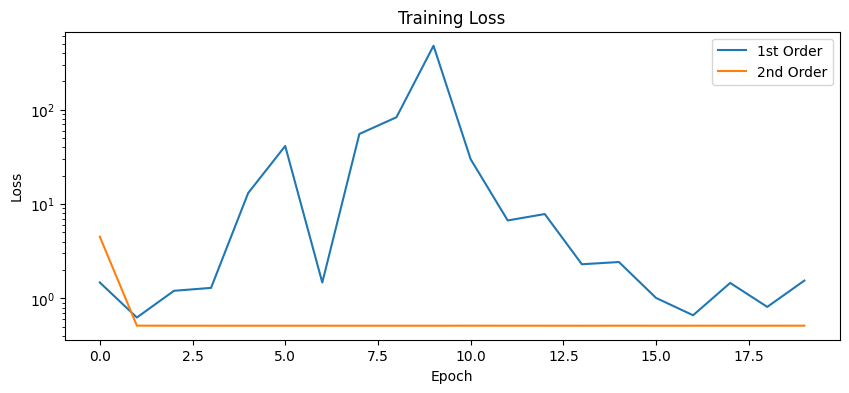

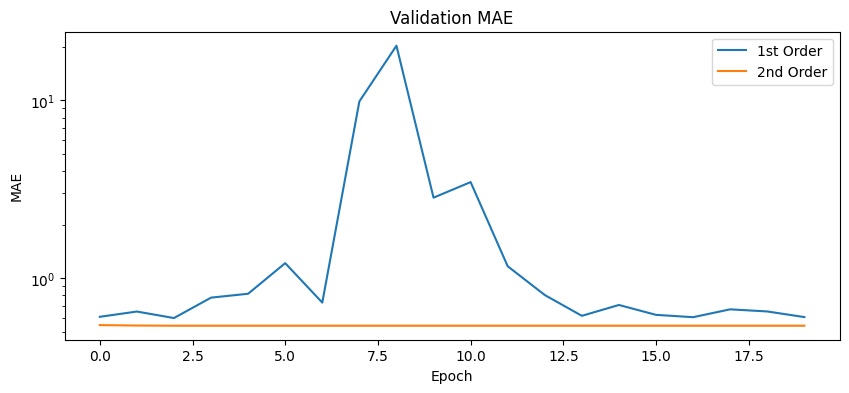

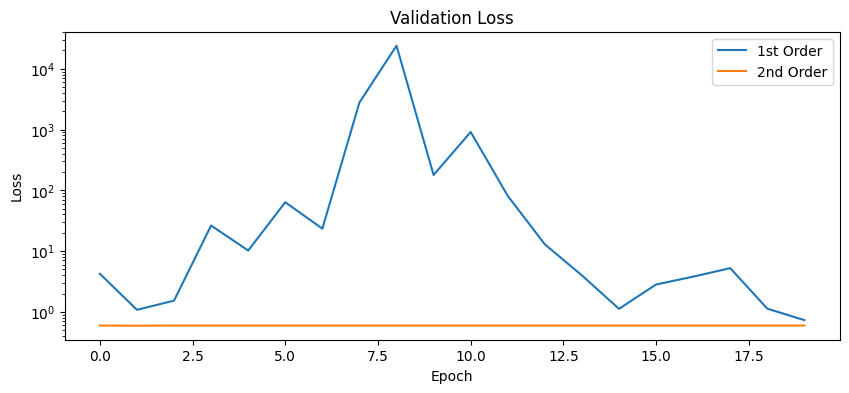

In [17]:
model_history = {"1st Order":history_adam.history,
                 "2nd Order":history_lfbgs.history}

# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log') # log scale for better visualization. Without this, they all just collapsed to flat lines and it was impossible to distinguish
plt.legend()
plt.show()

# # Training MAE
# plt.figure(figsize=(10, 4))
# for name in model_history:
#     plt.plot(model_history[name]['mae'], label=f'{name}')
# plt.title("Training MAE")
# plt.xlabel("Epoch")
# plt.ylabel("MAE")
# plt.yscale('log')
# plt.legend()
# plt.show()

# Validation MAE
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_mae'], label=f'{name}')
plt.title("Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.yscale('log')
plt.legend()
plt.show()

# Validation Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_loss'], label=f'{name}')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend()
plt.show()

# Using Stock Data

## Data Loading/Preparation

In [3]:
data2 = pd.read_csv('./datasets/features_with_next_prices_clean.csv')
data2.dropna(inplace = True)
data2.reset_index(inplace = True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76469 entries, 0 to 76468
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        76469 non-null  int64  
 1   date                         76469 non-null  object 
 2   return                       76469 non-null  float64
 3   high_open_ratio              76469 non-null  float64
 4   open_low_ratio               76469 non-null  float64
 5   high_close_ratio             76469 non-null  float64
 6   volatility_by_candle_number  76469 non-null  float64
 7   weekday                      76469 non-null  int64  
 8   volume                       76469 non-null  float64
 9   candle_direction             76469 non-null  float64
 10  earning_moment               76469 non-null  int64  
 11  rolling_std_return           76469 non-null  float64
 12  true_range                   76469 non-null  float64
 13  ATR             

In [4]:
X = data2.drop(columns=['index', 'date', 'candle_direction', 'tokenId', 'open_next', 'close_next'])
y = data2['open_next'].values.reshape(-1, 1)
contin = ['volatility_by_candle_number', 'volume',
          'rolling_std_return', 'true_range', 'ATR', 'volume_delta', 'volume_per_range', 'vix', 
          'amzn_vix_proxy', 'iv_delta', 'put_spread', 'call_spread', 'rsi', 'macd', 'return']
categorical = ['weekday', 'earning_moment', 'volume_spike']


preprocessor = make_column_transformer(
    (OneHotEncoder(sparse_output=False, drop="first"), categorical),
    remainder="passthrough"
)

tf.keras.backend.set_floatx('float64')
# X_train, X_test, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=3619) 
n = len(X)
split_idx = int(n * 0.8)   # 80% train / 20% test



X_train_raw = X[:split_idx]
X_test_raw  = X[split_idx:]
y_train_raw = y[:split_idx]
y_test_raw  = y[split_idx:]



scaler = StandardScaler()
y_train = scaler.fit_transform(y_train_raw)
y_test = scaler.transform(y_test_raw)
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)


X_train64 = X_train.astype('float64')
X_test64 = X_test.astype('float64')
y_train64 = y_train.astype('float64')
y_test64 = y_test.astype('float64')
num_features = X_train.shape[1]

## Prelim Model

In [5]:
tf.keras.backend.clear_session() # if necessary to remove float64
tf.keras.backend.set_floatx('float32')

In [6]:
model3 = keras.Sequential([ 
    keras.layers.Dense(512, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

model3.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mae'])

history_adam_stocks = model3.fit(X_train, y_train,
                           epochs=20, verbose=1, batch_size=256, # larger batch size for larger datasets... right?
                           validation_data=(X_test, y_test))

2025-10-23 12:18:34.160140: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-10-23 12:18:34.160173: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-23 12:18:34.160197: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-10-23 12:18:34.160216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-23 12:18:34.160229: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/20


2025-10-23 12:18:42.628880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


239/239 [==============================] - 11s 9ms/step - loss: 0.5518 - mae: 0.5057 - val_loss: 0.1270 - val_mae: 0.2786
Epoch 2/20
239/239 [==============================] - 2s 7ms/step - loss: 6.9049 - mae: 1.8961 - val_loss: 1.9274 - val_mae: 1.3175
Epoch 3/20
239/239 [==============================] - 2s 8ms/step - loss: 30.8011 - mae: 4.1345 - val_loss: 25.9470 - val_mae: 4.8385
Epoch 4/20
239/239 [==============================] - 2s 7ms/step - loss: 30.0788 - mae: 3.5290 - val_loss: 3.4682 - val_mae: 1.7785
Epoch 5/20
239/239 [==============================] - 2s 7ms/step - loss: 107.1825 - mae: 6.0848 - val_loss: 0.4791 - val_mae: 0.5874
Epoch 6/20
239/239 [==============================] - 2s 7ms/step - loss: 43.7797 - mae: 3.4424 - val_loss: 0.8199 - val_mae: 0.7289
Epoch 7/20
239/239 [==============================] - 2s 7ms/step - loss: 62.2787 - mae: 5.1613 - val_loss: 207.7227 - val_mae: 13.9281
Epoch 8/20
239/239 [==============================] - 2s 7ms/step - loss: 91

## L-BFGS Optimizer (via keras_opt)

In [7]:
tf.keras.backend.clear_session()
tf.keras.backend.set_floatx('float64')

In [ ]:
# runtime: 524 minutes (20 epochs)
# runtime: 1-2 minutes (1 epoch)
with tf.device('/CPU:0'): # needed bcs I cannot change GPU settings during runtime
    model4 = keras.Sequential([ 
        keras.layers.Dense(256, activation='relu', input_shape=(num_features,)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1, activation='linear')
    ])

    model4.compile(loss='mean_squared_error', 
                metrics=['mae'])

    model4.train_function = scipy_optimizer.make_train_function(
        model4,
        method="L-BFGS-B",            # top-level OK
        maxiter=300,                  # top-level OK
    )

    history_lfbgs_stocks = model4.fit(X_train64, y_train64,
                            epochs=1, verbose=1, batch_size=2048,
                            validation_data=(X_test64, y_test64))

     28/Unknown - 0s 10ms/step - loss: 1.0652

2025-10-23 12:20:51.359379: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     25/Unknown - 0s 9ms/step - loss: 0.4007 

2025-10-23 12:20:51.830795: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.19893

2025-10-23 12:20:52.299857: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.10186

2025-10-23 12:20:52.684855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.07323

2025-10-23 12:20:53.058446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.06927

2025-10-23 12:20:53.432109: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.06528

2025-10-23 12:20:53.832696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.06167

2025-10-23 12:20:54.197735: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.04694

2025-10-23 12:20:54.578428: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.02842

2025-10-23 12:20:54.949489: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.022184

2025-10-23 12:20:55.488633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     28/Unknown - 0s 8ms/step - loss: 0.0226

2025-10-23 12:20:55.903307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.01458

2025-10-23 12:20:56.329783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.01233

2025-10-23 12:20:56.718182: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.01030

2025-10-23 12:20:57.087080: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00911

2025-10-23 12:20:57.457056: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     28/Unknown - 0s 8ms/step - loss: 0.0101

2025-10-23 12:20:57.882206: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.01029

2025-10-23 12:20:58.287177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00984

2025-10-23 12:20:58.664110: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00871

2025-10-23 12:20:59.036230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00909

2025-10-23 12:20:59.411545: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     24/Unknown - 0s 11ms/step - loss: 0.0087

2025-10-23 12:20:59.881177: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00738

2025-10-23 12:21:00.336415: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00852

2025-10-23 12:21:00.713707: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00750

2025-10-23 12:21:01.093566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00627

2025-10-23 12:21:01.473319: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00616

2025-10-23 12:21:01.854902: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00633

2025-10-23 12:21:02.228339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00622

2025-10-23 12:21:02.610712: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00571

2025-10-23 12:21:02.980148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00588

2025-10-23 12:21:03.357776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00527

2025-10-23 12:21:03.726035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.005655

2025-10-23 12:21:04.205634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00544

2025-10-23 12:21:04.601341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00532

2025-10-23 12:21:04.989942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00484

2025-10-23 12:21:05.364418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00502

2025-10-23 12:21:05.734154: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00541

2025-10-23 12:21:06.130889: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00571

2025-10-23 12:21:06.510381: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00510

2025-10-23 12:21:06.894089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00530

2025-10-23 12:21:07.270812: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00478

2025-10-23 12:21:07.654801: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00519

2025-10-23 12:21:08.053811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.004748

2025-10-23 12:21:08.517185: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00497

2025-10-23 12:21:08.897365: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00457

2025-10-23 12:21:09.277783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00577

2025-10-23 12:21:09.652742: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00446

2025-10-23 12:21:10.046671: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00556

2025-10-23 12:21:10.424724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00484

2025-10-23 12:21:10.822195: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00426

2025-10-23 12:21:11.205007: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00494

2025-10-23 12:21:11.577728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00434

2025-10-23 12:21:11.961258: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00423

2025-10-23 12:21:12.341014: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.004342

2025-10-23 12:21:12.809512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00422

2025-10-23 12:21:13.185453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00401

2025-10-23 12:21:13.561932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00410

2025-10-23 12:21:13.946238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00420

2025-10-23 12:21:14.342200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00389

2025-10-23 12:21:14.715002: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00388

2025-10-23 12:21:15.087989: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00388

2025-10-23 12:21:15.465769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00368

2025-10-23 12:21:15.840167: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00518

2025-10-23 12:21:16.236246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00358

2025-10-23 12:21:16.613029: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.005337

2025-10-23 12:21:17.062628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00337

2025-10-23 12:21:17.443219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00356

2025-10-23 12:21:17.817332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00316

2025-10-23 12:21:18.197165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.004036

2025-10-23 12:21:18.733033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00386

2025-10-23 12:21:19.100636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00375

2025-10-23 12:21:19.493285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     22/Unknown - 0s 8ms/step - loss: 0.0035

2025-10-23 12:21:19.888643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00325

2025-10-23 12:21:20.294899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00365

2025-10-23 12:21:20.696566: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00325

2025-10-23 12:21:21.086603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.003635

2025-10-23 12:21:21.539469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     26/Unknown - 0s 8ms/step - loss: 0.0034

2025-10-23 12:21:21.950673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00354

2025-10-23 12:21:22.359518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00335

2025-10-23 12:21:22.730806: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00354

2025-10-23 12:21:23.113046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00354

2025-10-23 12:21:23.495212: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00324

2025-10-23 12:21:23.872426: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00403

2025-10-23 12:21:24.263061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00336

2025-10-23 12:21:24.639061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00474

2025-10-23 12:21:25.006398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00283

2025-10-23 12:21:25.439155: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00313

2025-10-23 12:21:25.825850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00333

2025-10-23 12:21:26.207974: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00342 

2025-10-23 12:21:26.606053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00302

2025-10-23 12:21:26.976004: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00452

2025-10-23 12:21:27.349683: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00301

2025-10-23 12:21:27.723619: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00292

2025-10-23 12:21:28.098071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00272

2025-10-23 12:21:28.482674: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00321

2025-10-23 12:21:28.856663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00281

2025-10-23 12:21:29.235819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.003132

2025-10-23 12:21:29.685665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00331

2025-10-23 12:21:30.064753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00301

2025-10-23 12:21:30.439666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00300

2025-10-23 12:21:30.837701: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00300

2025-10-23 12:21:31.217709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00279

2025-10-23 12:21:31.599953: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00280

2025-10-23 12:21:31.974972: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00280

2025-10-23 12:21:32.362165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00269

2025-10-23 12:21:32.735006: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00279

2025-10-23 12:21:33.112368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00259

2025-10-23 12:21:33.486662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.003229

2025-10-23 12:21:33.945741: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00259

2025-10-23 12:21:34.332213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00299

2025-10-23 12:21:34.711634: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00279

2025-10-23 12:21:35.091877: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00258

2025-10-23 12:21:35.466625: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00288

2025-10-23 12:21:35.865482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00378

2025-10-23 12:21:36.238243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00418

2025-10-23 12:21:36.622633: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00298

2025-10-23 12:21:36.994228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00268

2025-10-23 12:21:37.366629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.002627

2025-10-23 12:21:37.820657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00278

2025-10-23 12:21:38.211213: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00277

2025-10-23 12:21:38.593564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00267

2025-10-23 12:21:38.971020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00296

2025-10-23 12:21:39.342575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00267

2025-10-23 12:21:39.724740: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00277

2025-10-23 12:21:40.116786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00266

2025-10-23 12:21:40.502050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00287

2025-10-23 12:21:40.874823: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00276

2025-10-23 12:21:41.255199: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00286

2025-10-23 12:21:41.642094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.002526

2025-10-23 12:21:42.097753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00236

2025-10-23 12:21:42.491061: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00265

2025-10-23 12:21:42.868000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00275

2025-10-23 12:21:43.244536: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00246

2025-10-23 12:21:43.636642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00275

2025-10-23 12:21:44.019679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00245

2025-10-23 12:21:44.401096: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00235

2025-10-23 12:21:44.786128: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00255

2025-10-23 12:21:45.169051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00235

2025-10-23 12:21:45.542164: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     25/Unknown - 0s 10ms/step - loss: 0.0025

2025-10-23 12:21:45.990808: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00254

2025-10-23 12:21:46.407599: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     22/Unknown - 0s 7ms/step - loss: 0.0025

2025-10-23 12:21:46.807751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     29/Unknown - 0s 8ms/step - loss: 0.0025

2025-10-23 12:21:47.231209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     29/Unknown - 0s 8ms/step - loss: 0.0024

2025-10-23 12:21:47.834239: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     25/Unknown - 0s 9ms/step - loss: 0.0025 

2025-10-23 12:21:48.359396: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00274

2025-10-23 12:21:48.794462: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     26/Unknown - 0s 9ms/step - loss: 0.0024

2025-10-23 12:21:49.212959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00244

2025-10-23 12:21:49.644624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     28/Unknown - 0s 8ms/step - loss: 0.0024

2025-10-23 12:21:50.068660: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.002624

2025-10-23 12:21:50.589228: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00253

2025-10-23 12:21:50.989051: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00244

2025-10-23 12:21:51.379543: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00214

2025-10-23 12:21:51.777992: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00243

2025-10-23 12:21:52.186350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00224

2025-10-23 12:21:52.596190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00233

2025-10-23 12:21:52.974762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00223

2025-10-23 12:21:53.357564: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00233

2025-10-23 12:21:53.744290: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00224

2025-10-23 12:21:54.126273: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00233

2025-10-23 12:21:54.514190: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00253

2025-10-23 12:21:54.912299: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00233

2025-10-23 12:21:55.302058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00222

2025-10-23 12:21:55.706666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00243

2025-10-23 12:21:56.090092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     25/Unknown - 0s 11ms/step - loss: 0.0022

2025-10-23 12:21:56.581452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00362

2025-10-23 12:21:57.016706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00242

2025-10-23 12:21:57.406315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00222

2025-10-23 12:21:57.795361: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00243

2025-10-23 12:21:58.178327: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00253

2025-10-23 12:21:58.568695: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00222

2025-10-23 12:21:58.956281: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00242 

2025-10-23 12:21:59.364487: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00202

2025-10-23 12:21:59.749919: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00202

2025-10-23 12:22:00.135574: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00212

2025-10-23 12:22:00.528729: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00232

2025-10-23 12:22:00.925822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00222

2025-10-23 12:22:01.345267: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00222

2025-10-23 12:22:01.732690: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00212

2025-10-23 12:22:02.139942: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00231

2025-10-23 12:22:02.525115: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.002021

2025-10-23 12:22:03.016048: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00223

2025-10-23 12:22:03.404288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00222

2025-10-23 12:22:03.779197: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00231

2025-10-23 12:22:04.163515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00212

2025-10-23 12:22:04.570751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00182

2025-10-23 12:22:04.966230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00211

2025-10-23 12:22:05.340748: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00221

2025-10-23 12:22:05.720429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00212

2025-10-23 12:22:06.100658: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00341

2025-10-23 12:22:06.483089: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.002222

2025-10-23 12:22:06.959394: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00191

2025-10-23 12:22:07.339803: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00211

2025-10-23 12:22:07.712852: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00191

2025-10-23 12:22:08.110868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00201

2025-10-23 12:22:08.497982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


     22/Unknown - 0s 8ms/step - loss: 0.0021

2025-10-23 12:22:08.891937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00191

2025-10-23 12:22:09.294171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00201

2025-10-23 12:22:09.686101: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00191

2025-10-23 12:22:10.071306: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.002121

2025-10-23 12:22:10.535448: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00231

2025-10-23 12:22:10.939189: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00201

2025-10-23 12:22:11.333810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00220

2025-10-23 12:22:11.712772: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00221

2025-10-23 12:22:12.131242: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00201

2025-10-23 12:22:12.522912: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00191

2025-10-23 12:22:12.923134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00201

2025-10-23 12:22:13.305276: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


      0/Unknown - 0s 0s/step - loss: 0.00210

2025-10-23 12:22:13.694622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


30/30 [==============================] - ETA: 0s - loss: 0.0021

2025-10-23 12:22:14.189756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


30/30 [==============================] - 84s 3s/step - loss: 0.0269 - val_loss: 5.9918e-04 - val_mae: 0.0155


## Plotting Performance

### Performance Metrics

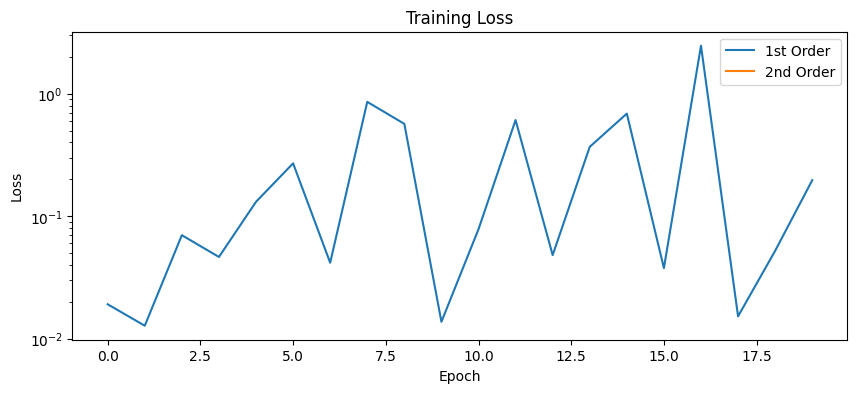

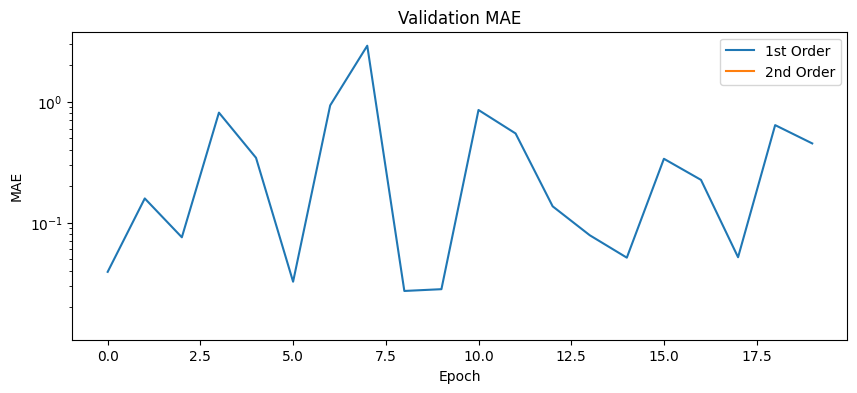

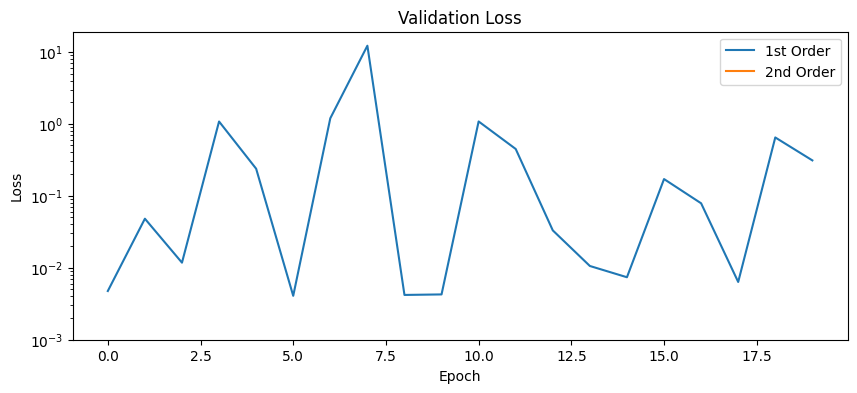

In [15]:
model_history = {"1st Order":history_adam_stocks.history,
                 "2nd Order":history_lfbgs_stocks.history}

# Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['loss'], label=f'{name}')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log') # log scale for better visualization. Without this, they all just collapsed to flat lines and it was impossible to distinguish
plt.legend()
plt.show()

# # Training MAE
# plt.figure(figsize=(10, 4))
# for name in model_history:
#     plt.plot(model_history[name]['mae'], label=f'{name}')
# plt.title("Training MAE")
# plt.xlabel("Epoch")
# plt.ylabel("MAE")
# plt.yscale('log')
# plt.legend()
# plt.show()

# Validation MAE
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_mae'], label=f'{name}')
plt.title("Validation MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.yscale('log')
plt.legend()
plt.show()

# Validation Loss
plt.figure(figsize=(10, 4))
for name in model_history:
    plt.plot(model_history[name]['val_loss'], label=f'{name}')
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend()
plt.show()

### Actual vs Predicted Values

478/478 [==============================] - 1s 1ms/step


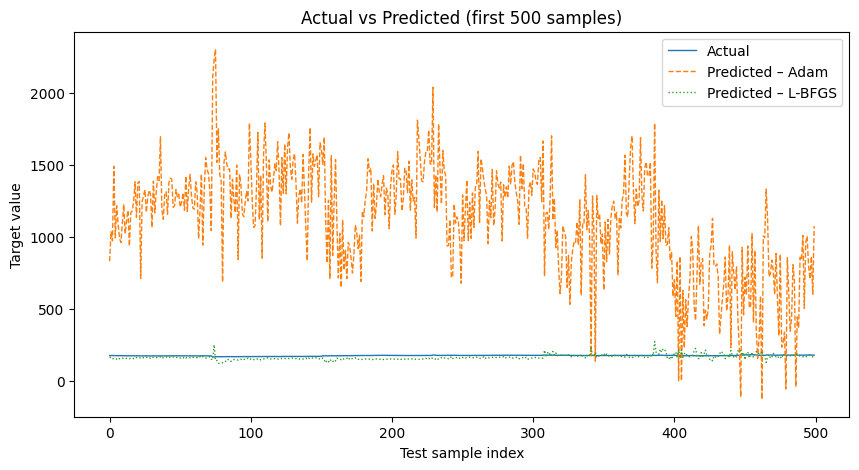

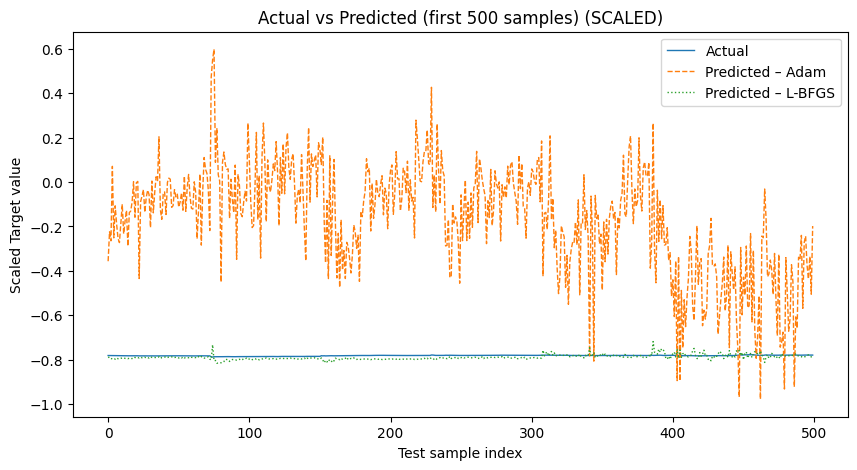

In [12]:
y_pred_adam   = model3.predict(X_test.astype(np.float32))        # likely float32
y_pred_lbfgs  = model4.predict(X_test64)                          # float64

# inverse transform so values are in original scale
y_test_orig = scaler.inverse_transform(y_test64.reshape(-1,1)).ravel()
y_pred_adam_orig = scaler.inverse_transform(y_pred_adam.astype(np.float64)).ravel()
y_pred_lbfgs_orig = scaler.inverse_transform(y_pred_lbfgs).ravel()

N = len(y_test_orig)
idx = np.arange(N)
# pick first n samples to plot
n_plot = 500
idx_sub = idx[:n_plot]

plt.figure(figsize=(10,5))
plt.plot(idx_sub, y_test_orig[idx_sub], label='Actual', linewidth=1)
plt.plot(idx_sub, y_pred_adam_orig[idx_sub], label='Predicted – Adam', linewidth=1, linestyle='--')
plt.plot(idx_sub, y_pred_lbfgs_orig[idx_sub], label='Predicted – L-BFGS', linewidth=1, linestyle=':')
plt.legend()
plt.title("Actual vs Predicted (first {} samples)".format(n_plot))
plt.xlabel("Test sample index")
plt.ylabel("Target value")
plt.show()

plt.figure(figsize=(10,5))
plt.plot(idx_sub, y_test[idx_sub], label='Actual', linewidth=1)
plt.plot(idx_sub, y_pred_adam[idx_sub], label='Predicted – Adam', linewidth=1, linestyle='--')
plt.plot(idx_sub, y_pred_lbfgs[idx_sub], label='Predicted – L-BFGS', linewidth=1, linestyle=':')
plt.legend()
plt.title("Actual vs Predicted (first {} samples) (SCALED)".format(n_plot))
plt.xlabel("Test sample index")
plt.ylabel("Scaled Target value")
plt.show()

